**Rationale** Perhaps the most important medium of communicating data-driven insights is through the construction of effective graphs. This assignment is designed for you to practice making some common types of graphs.

[Datasets](https://drive.google.com/open?id=1-oR65kkGk7TIzBtRGXVWhkeU1q7yIc-x&authuser=tul67796%40temple.edu&usp=drive_fs) required

1. [Rent the Runway item fit](https://drive.google.com/open?id=15UtPTWFea2YfU51SRrZJDyM4aI0YXVFU&authuser=tul67796%40temple.edu&usp=drive_fs)
1. [Orange Telecom customer churn](https://drive.google.com/open?id=15eDf_6pamH9GLA1PNMdOlF4YSYHu_zc8&authuser=tul67796%40temple.edu&usp=drive_fs)

# 1. (5 points) Bar Plot - Rent the runway dataset

For categories with at least 100 observations, plot the proportion of reviews that indicated that the item fits using a bar plot.

Answer these questions (see detailed prompt at end of section):

1. Which categories fit the best? Which categories fit the worst?
1. Does this bar plot confirm or reject your prior expectations? Explain.
1. How can you mitigate the fit issues?


**Follow each of the steps below**

In [ ]:
from google.colab import drive
drive.mount('drive')
import os

Mounted at drive


In [ ]:
# import the libraries you need: (pandas, matplotlib)
fpath ='drive/MyDrive/customer analytics/'
os.listdir(fpath)

['telecom_churn.csv', 'renttherunway_final_data.json']

In [ ]:
# specify the folder in your Google MyDrive containing the datasets for this assignment
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
# read in file use read_json(fpath + 'rentherunway_final_data.json', lines = True)
# call the dataframe: rent

rent = pd.read_json('drive/MyDrive/customer analytics/' + 'renttherunway_final_data.json', lines = True)

In [ ]:
# preview the first 5 rows the dataset to get a sense of its contents

rent

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


**Double click to edit** 

Fill in the blanks

* In the dataframe `rent`, one row represents the data for one ___customer______________

To construct a dataframe that has 1 row = 1 category and summarize the number of rows per category:

* Which variable should you groupby? ____category____________
* Which variable can you summarize? ______review text / review summary__________
* Which summary function should you use? _________dfname.groupby('groupvarname')['summaryvariable'].summaryfunction()_______

In [ ]:
# execute the groupby to construct the desired dataframe (remember to add .reset_index() to the end of the groupby statement)
# call the resulting dataframe (assign to this variable): count100

count100 = rent.groupby('category')['user_id'].count().reset_index() # i don't quite understand the summary fuction in this question so i copy the summury function from the un class actitivy solution.
count100

,category,user_id
0,ballgown,16
1,blazer,782
2,blouse,651
3,blouson,14
4,bomber,128
...,...,...
63,trouser,55
64,trousers,18
65,tunic,162
66,turtleneck,34


In [ ]:
# rename the columns to 'category' and 'obs'

count100.columns = ['category', 'obs']


**Double click to edit**\
Fill in the blanks

To merge `cat100` and `rent`, we should use ___category_________ as the left dataframe and rent1 as the right dataframe.

We should merge on the variable _________category____________

We will use an inner merge.

In [ ]:
# merge count100 with the rent, reuse the variable rent by replacing it with the result of the merge

rent1= rent.merge(count100, how='left', on='category')


In [ ]:
# preview rent dataframe to show that there's a new column: "obs"


rent1

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",3070
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",44381
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",19316
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",92884
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",44381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",5184
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",92884
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",92884
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",92884


In [ ]:
# what are the unique values in fit column? select the fit column and use the .unique() method
rent1.fit.unique()


array(['fit', 'small', 'large'], dtype=object)

In [ ]:
# create a column in rent called 'fit1'

# first initialize the fit1 column where all observations in the column are 0's 
# modify the generic syntax df['column name'] = 0


# select the subset of fit1 column where fit column has the value "fit"
## e.g. select rows where fit column has the value 'fit' and the column 'fit1'
## set these rows of the fit1 column = 1 (modify the syntax df.loc[conditions, 'column name'] = 1)

rent1['fit1'] = 0



In [ ]:
rent1.loc[rent1.fit=='fit', 'fit1'] = 1 # in this question i forget to type , and my fit1 become 0 at first.

In [ ]:
rent1

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs,fit1
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",3070,1
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",44381,1
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",19316,1
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",92884,1
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",44381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",5184,1
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",92884,1
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",92884,1
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",92884,1


In [ ]:
# sample 20 random rows of the rent dataframe, make sure the fit1 column corresponds
# to the correct rows as indicated by the fit column
# (run the code several times if you don't see any rows that indicate item did not fit (fit1 is 0))
rent1.sample(20)



,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs,fit1
111418,fit,885960,32d,1330312,120lbs,10.0,other,Fit perfectly. I have a large chest & did not...,full bust,Loved it!,shift,"5' 7""",8,49.0,"May 29, 2016",5365,1
96750,fit,251238,34c,135459,130lbs,10.0,wedding,"I was 4 months postpartum, back to normal weig...",athletic,"The dress is classic, great length, and great ...",dress,"5' 7""",16,31.0,"March 20, 2017",92884,1
17280,fit,726755,32a,127081,110lbs,8.0,wedding,"this dress is true to size, very light and flo...",petite,effortless sophistication,gown,"5' 2""",1,36.0,"May 6, 2014",44381,1
14346,large,364592,34c,468020,124lbs,8.0,wedding,I ordered this weeks in advance for a wedding....,hourglass,PROBLEM WITH LINING,dress,"5' 3""",8,29.0,"September 16, 2015",92884,0
55389,fit,832321,34c,1099530,132lbs,10.0,work,Great dress to wear to work for the summer. Th...,athletic,Color is AWESOME,shift,"5' 8""",8,31.0,"August 1, 2016",5365,1
131501,fit,632085,34b,148089,165lbs,10.0,party,Well built dress! Agree that the inner lining ...,pear,I wore this for a reception at a conference - ...,dress,"5' 5""",16,32.0,"May 28, 2015",92884,1
83524,small,300629,36c,200393,165lbs,8.0,party,I wore this dress for my birthday dinner. Yes ...,athletic,Awesome dress,shift,"5' 6""",24,29.0,"September 26, 2013",5365,0
52923,fit,918984,34d,1746190,138lbs,10.0,wedding,This was my first experience with Rent the Run...,NaN,Beautiful and unique. Be ready for tons of com...,dress,"5' 4""",12,35.0,"July 11, 2016",92884,1
173455,fit,356771,36b,141761,135lbs,8.0,wedding,I really liked the material for the dress and ...,pear,Got to see old friends!,dress,"5' 6""",12,30.0,"May 30, 2014",92884,1
8901,fit,204074,NaN,1007691,120lbs,10.0,wedding,Fits like a glove.,athletic,This dress is beautiful! ! Reviewed so many co...,dress,"5' 4""",1,37.0,"February 25, 2017",92884,1


In [ ]:
# Create a new dataframe, rent100, that is the subset of rows of rent that come from categories with at least 100 observations
# Modify the generic syntax newdf = olddf.loc[condition]
rent100 = rent1.loc[rent1.obs>=100]
rent100
# in this question, i could not figure out the condition, so i reach out to han and he gave me a hint on this question, also the class note , finally figure out

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs,fit1
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",3070,1
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",44381,1
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",19316,1
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",92884,1
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",44381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",5184,1
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",92884,1
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",92884,1
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",92884,1


**Double click to edit** 

To construct a dataframe that has 1 row = 1 category and summarize the proportion of rental reviews that indicate the item from that category fits

* Which variable should you groupby? _________category_______
* Which variable can you summarize? ______review text and review summary__________
* Which summary function should you use? ________dfname.groupby('groupvarname')['summaryvariable'].summaryfunction()_______

In [ ]:
# execute the groupby
# (remember to add .reset_index() to the end of the groupby statement)
# call the resulting dataframe (assign to this variable): fit100 
fit100 = rent100.groupby('category')['fit1'].mean().reset_index()
# the first ime i typed fit100 = rent100.groupby('category')['fit1'].count().reset_index() and the y axis become really large, then i reach out to han and he give me some hint, therefore i came up with the answer below.


In [ ]:
# display the fit100 dataframe, make sure it contains the expected information
# e.g. category and proportion of fit

fit100




,category,fit1
0,blazer,0.760870
1,blouse,0.743472
2,bomber,0.734375
3,cardigan,0.659751
4,coat,0.595918
5,culottes,0.691489
6,down,0.698276
7,dress,0.716668
8,frock,0.687805
9,gown,0.792614


In [ ]:
# sort this fit100 dataframe from smallest to largest proportion
# be sure to specify the inplace = True option to alter the dataframe
# we need this step to make the resulting bar plot ordered from shortest 
# to tallest bar
# modify the generic syntax df.sort_values(by = 'sort column name', inplace = True)
fit100.sort_values(by ='fit1', inplace = True)



In [ ]:
# display the resulting dataframe again to make sure it is properly sorted

fit100

,category,fit1
30,vest,0.586331
4,coat,0.595918
16,pants,0.623223
21,shirt,0.631769
29,tunic,0.641975
3,cardigan,0.659751
20,shift,0.683504
23,skirt,0.686479
8,frock,0.687805
27,tank,0.690608


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

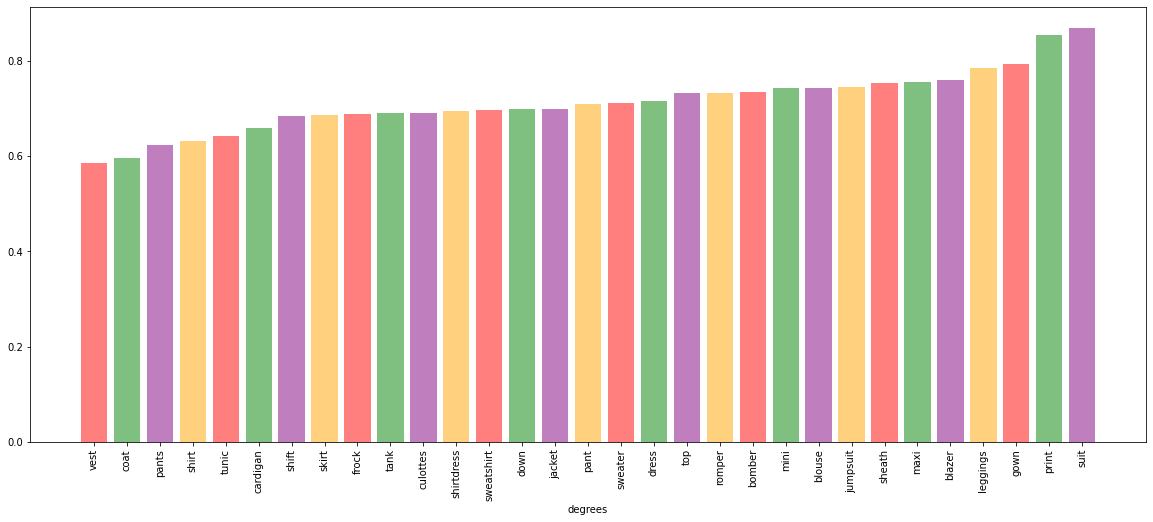

In [ ]:
# construct the bar plot
# make the bar plot easy to read by:
# adjust the figure size
# x-axis labels degrees
# other appearance parameters

# MAKE SURE TO LABEL YOUR AXES
plt.figure(figsize=(20,8))
plt.bar(fit100.category, fit100.fit1, color = ['red', 'green', 'purple', 'orange'], alpha=0.5)
plt.xlabel('degrees')
plt.xticks(rotation=90)




**Double Click to Edit**
1. The category that fit best is ______suit_________________.
    1. The category that fit worst is ___________vest____________.
1. I think this bar chart do not quite make sense because wheather fit or not fit is based on individual. Furthermore,it is kind of weird that the suit fit the most but vest fit the worst on the ground that both kinds of closing and be costomized and fit on the customer.
1. Two strategies that can mitigate the fit issues are:
    1. try on the cloth first before you purchase.
    2. the cloth that really need to fit on one person like the suit can focus more on cusomization to make sure that it fits the cutomer's shape.

# 2. (5 points) Scatter plot - Orange Telecom

Create 2 plots: 

First, construct a scatter plot that visualizes the relationship between the number of calls made and the cost per call paid.

Second, construct a scatter plot that visualizes total minutes used and average rate paid per minute, use color to indicate churned customers.

Note that customer **churn** is the marketing term for a customer who has defected / ended the business relationship (cancelled their contract).

Be sure to:
1. **adjust the sizes / colors / transparency** of the points to be visually appealing.
1. Label your axes

Questions:
1. Describe the relationship between number of calls and cost per call.
    1. What might explain this relationship?
1. Describe any differences in the usage patterns among customers who have churned vs. those who have not?
    1. What might cause the(se) difference(s)?

**Follow the detailed prompts below**

In [ ]:
# read in your dataset using read_csv(fpath + 'telecom_churn.csv')
# call the dataframe orange
orange = pd.read_csv('drive/MyDrive/customer analytics/' + 'telecom_churn.csv' )
orange



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
# preview the first 5 rows to get a sense of this data
orange.head(5)



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Double click to edit**
Fill in the blank
1. Each row represents the data for one telecom_.

In [ ]:
# create 3 new columns:
# 'Total_Minutes': sum of total day, eve, night, and international minutes
# 'Total_Charges' sum of total day, eve, night, and international charges
# 'Total_Calls' sum of total day, eve, night, and international calls
orange['Total_Minutes'] = orange['Total day minutes'] + orange['Total eve minutes']+ orange['Total night minutes'] + orange['Total intl minutes']
orange['Total_Charges'] = orange['Total day charge'] + orange['Total eve charge'] + orange['Total night charge'] + orange['Total intl charge']
orange['Total_Calls'] = orange['Total day calls'] + orange['Total eve calls'] + orange['Total night calls'] + orange['Total intl calls']
orange
 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,660.7,60.10,292
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,585.4,63.53,239
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,675.6,67.74,264
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,517.6,57.53,336


In [ ]:
# create 2 additional columns
# 'Avg_Rate': the average charge per minute (use columns created above to help you make the new column)
# 'Cost_Per_Call': the average charge per call (use columns created above to help you make the new column)
orange['Avg_Rate'] = orange['Total_Charges']/orange['Total_Minutes']
orange['Cost_per_call'] = orange['Total_Charges']/orange['Total_Calls']
orange





,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls,Avg_Rate,Cost_per_call
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303,0.105354,0.249373
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332,0.094754,0.178434
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333,0.115480,0.187057
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255,0.118272,0.261961
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359,0.101738,0.145097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,660.7,60.10,292,0.090964,0.205822
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,585.4,63.53,239,0.108524,0.265816
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,675.6,67.74,264,0.100266,0.256591
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,517.6,57.53,336,0.111148,0.171220


<Figure size 720x576 with 0 Axes>

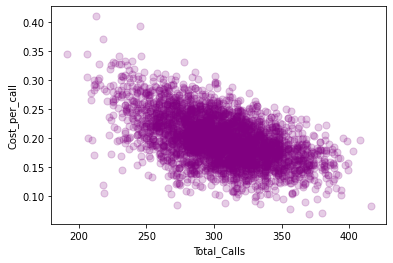

<Figure size 720x576 with 0 Axes>

In [ ]:
# Create the first scatter plot
# Use the x-axis for number of calls
# Use the y-axis for the cost per call
# Label both axes
# play with plotting parameters (size, alpha, figure size, etc.) to make the plot more appealing
# make the figure size 10 x 8
plt.scatter(orange.Total_Calls, orange.Cost_per_call, c='purple', s=50, alpha=0.2)
plt.xlabel('Total_Calls')
plt.ylabel('Cost_per_call')
plt.figure(figsize=(10,8))












**Double Click to Edit**

Answers

According to the diagram, the more Calls people make the less a call cost.
That is, the relationship between Total calls and Cost per call is negative.
In a production factory, when it porduce higher scale of the products, the cost per product will be lower. I think it can be apply to the diagram. the cost per call will be lower if people got a higer total calls. The majority make calls between 250-350 calls whereas the least people reach to 400 totally calls because the reason is simple just most people won't call that much.


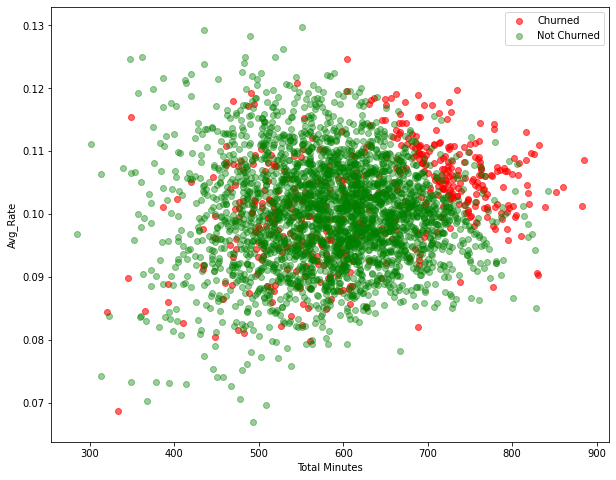

In [ ]:
## Create the second plot
# this figure requires making 2 plots on the same figure: one for churned, one for not 
# (e.g. select the rows that are churned (or not) and the appropriate column for the x and y values that go into the scatter plot function)
# Recall, you can select a subset of a particular column using the syntax: df.loc[conditions, 'column name']
# note the condition to select churned (not) customer should be orange.Churn == True (orange.Churn == False)

# make the churned group color red
# make the not churned group color green

# adjust the transparency, dot size, etc. to make the figure appealing
# CREATE A LEGEND, make sure the legend is legible
# make the figure size 10 x 8
plt.figure(figsize=(10,8))
plt.scatter(orange.loc[orange.Churn==True,'Total_Minutes'], orange.loc[orange.Churn==True,'Avg_Rate'], c='red', alpha=0.6)
plt.scatter(orange.loc[orange.Churn==False,'Total_Minutes'], orange.loc[orange.Churn==False,'Avg_Rate'], c='green', alpha=0.4)
plt.xlabel('Total Minutes')
plt.ylabel('Avg_Rate')
plt.legend(['Churned','Not Churned'])















**Double Click to Edit**

Answers

1. The higher the cutomer's total minutes of call the higher possibility that the customer will churn. 